# Baseball Database
## James Tench
## Udacity Data Analyst Nanodegree


### Project Overview
Conduct data analysis of your choice from a given dataset. Create a file that documents findings.


### Project Details

For this project I decided to analyze the Lahman baseball data set. This data set is a collection of baseball statistics from 1871 through current. It contains information about players, teams, and other statistics. 

After reviewing what information was in all of the files, here are questions I would like to attempt to answer

1. Do teams that pay out more per player in salaries tend to win more games?
2. How do the number of strike outs correlate with the number of games won?
3. Does a better defense or better offense result in more wins? For better offense we will use runs scored. For better defense we will use the earned runs allowed.

### Method of investigation
1. First the data sets were reviewed by reading the online documentation about each data table
2. Data was imported using pandas
3. As I decided on variables to review I inspected for missing or unusual data
4. Additional discovery, data cleaning, and analysis was done while investigating each question

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
def corrected_standard_err(x):
    return (x - x.mean()) / x.std(ddof=0)

In [37]:
def correlation(x, y):
    # correlation = average of (x in standard units) times (y in standard units)
    std_x = corrected_standard_err(x)
    std_y = corrected_standard_err(y)
    
    return (std_x * std_y).mean()

In [38]:
def add_win_percent_to_df(df):
    # calculated metric to account for seasons with less games
    df['winPercent'] = df['W'] / (df['W'] + df['L'])

In [39]:
# Teams.csv contains team level stats
# This table will be useful in answering the question about the correlation between
# losses and errors. In addition, winning statistics can be combined with the Salaries.csv
# table to answer questions about the salaries
teams_df = pd.read_csv('baseballdatabank-master/core/Teams.csv')
add_win_percent_to_df(teams_df)

In [40]:
# Uncomment to see the first few records
#teams_df.head()

In [41]:
win_percent_df = teams_df[['yearID', 'teamID', 'winPercent']]

In [42]:
# Salaries.csv shows the player's salary, year and team they were associated with
# Although the Master.csv file has data back to 1871, this file only goes back to 1985
# so salary analysis should be restricted to that time frame
# as part of the data wrangling phase data prior to 1985 have been removed
salary_df = pd.read_csv('baseballdatabank-master/core/Salaries.csv')

In [43]:
win_percent_since_salary_tracking_df = win_percent_df[win_percent_df['yearID'] > 1984]

In [44]:
# Uncomment to see the first few records
#teams_since_salary_tracking_df.head()

In [45]:
# get the mean salary for each team per year
# taking the mean vs total sum to account for teams having more or less players
# included in their total salary number
yearly_team_salary_df = salary_df.groupby(['yearID', 'teamID'], as_index=False).mean()

In [46]:
# Uncomment to see the first few records
#yearly_team_salary_df.head()

In [47]:
# merge the records into one data frame based on the key of yearID and teamID
salary_win_percent_df = win_percent_since_salary_tracking_df.merge(yearly_team_salary_df, on=['yearID', 'teamID'])

In [48]:
salaries = salary_win_percent_df['salary']
win_percent = salary_win_percent_df['winPercent']

In [49]:
win_percent.describe()

count    888.000000
mean       0.499989
std        0.068819
min        0.265432
25%        0.450617
50%        0.500000
75%        0.549383
max        0.716049
Name: winPercent, dtype: float64

In [50]:
print correlation(win_percent, salaries)

0.206019389693


In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


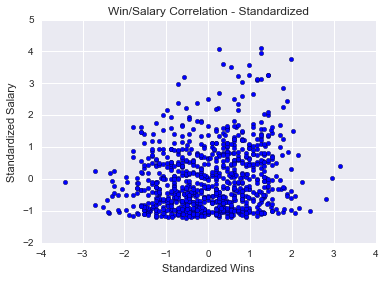

In [52]:
# because salaries are so high, standardized the metrics for charting
standardized_salaries = corrected_standard_err(salaries)
standardized_wins = corrected_standard_err(win_percent)
plt.scatter(standardized_wins, standardized_salaries)
plt.title("Win/Salary Correlation - Standardized")
plt.xlabel("Standardized Wins")
plt.ylabel("Standardized Salary")

In [53]:
# For further exploration, see how salaries have changed over the years
yearly_salary_df = salary_df.groupby(['yearID'], as_index=False).mean()

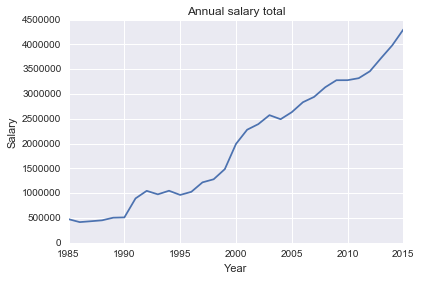

In [54]:
plt.plot(yearly_salary_df['yearID'], yearly_salary_df['salary'])
plt.title("Annual salary total")
plt.xlabel("Year")
plt.ylabel("Salary")

### Findings - Do higher average salaries correlate to more winning games?
Based on the computed correlation we can see that there appears to be a small positive correlation between average salaries and the number of wins in a season. Although the relationship is positive it appears to be to small to consider this as a strong relationship. The scatter plot and the standarized scatter plot also support this visually because they do not show strong correlations, linear or otherwise.

In [55]:
# Answer the next question. Do the number of strike outs correlate the the number of games won?
# The Teams.csv file has a number of fields that are empty for strikeouts, or set to 0
# I am excluding those from the calculation as there appears to be some error, or missing information
# for those records.

teams_with_strikeouts_recorded_df = teams_df[teams_df['SO'] > 0]

In [56]:
strikeouts = teams_with_strikeouts_recorded_df['SO']
win_percent = teams_with_strikeouts_recorded_df['winPercent']

In [57]:
print correlation(win_percent, strikeouts)

-0.0217896648879


In [58]:
strikeouts.describe()

count    2663.000000
mean      744.045437
std       292.137117
min         3.000000
25%       511.000000
50%       761.000000
75%       972.000000
max      1535.000000
Name: SO, dtype: float64

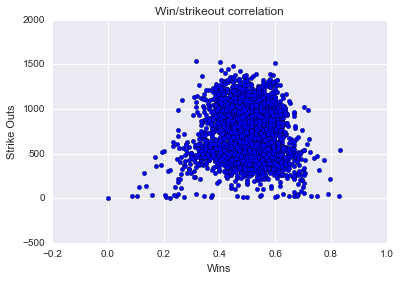

In [59]:
plt.scatter(win_percent, strikeouts)
plt.title("Win/strikeout correlation")
plt.xlabel("Wins")
plt.ylabel("Strike Outs")

### Findings - Do more strikeouts result in less wins?
Strike outs do not appear to have a correlation with wins. This result is actually contrary to what I would have guessed. I would have assumed that teams with more strikeouts are hitting the ball less on average which in turn would result in less runs being scored overall which one would think would result in less overall wins. However, this does not appear to be the case.

The correlation is negative but at the same time is very close to zero so it would not be used to suggest that less strike outs will lead to more wins.

In [60]:
# Question three data. Do better offensive, or defensive stats correlate to more wins?
win_percent = teams_df['winPercent']
runs = teams_df['R']
earned_runs_allowed = teams_df['ER']

In [61]:
print correlation(win_percent, runs)

0.503801457995


In [62]:
print correlation(win_percent, earned_runs_allowed)

-0.242355618105


In [63]:
runs.describe()

count    2805.000000
mean      681.945811
std       135.738244
min        24.000000
25%       613.000000
50%       690.000000
75%       763.000000
max      1220.000000
Name: R, dtype: float64

In [64]:
earned_runs_allowed.describe()

count    2805.000000
mean      570.895187
std       146.958007
min        25.000000
25%       500.000000
50%       590.000000
75%       666.000000
max      1023.000000
Name: ER, dtype: float64

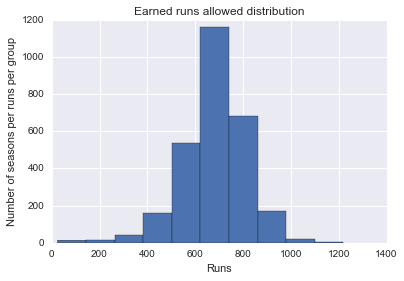

In [65]:
# show the distribution of the metrics being used as offensive and defensive stats
plt.hist(runs)
plt.title("Earned runs allowed distribution")
plt.xlabel("Runs")
plt.ylabel("Number of seasons per runs per group")

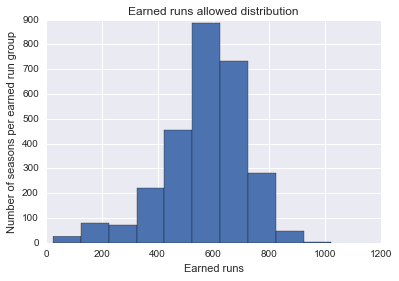

In [66]:
plt.hist(earned_runs_allowed)
plt.title("Earned runs allowed distribution")
plt.xlabel("Earned runs")
plt.ylabel("Number of seasons per earned run group")

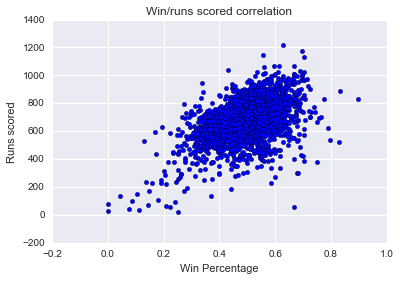

In [67]:
# plot the correlation of win percent and runs
plt.scatter(win_percent, runs)
plt.title("Win/runs scored correlation")
plt.xlabel("Win Percentage")
plt.ylabel("Runs scored")

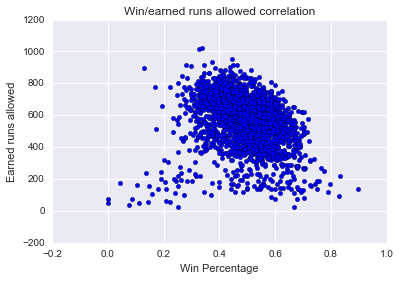

In [68]:
# plot the correlation of win percent and earned runs allowed
plt.scatter(win_percent, earned_runs_allowed)
plt.title("Win/earned runs allowed correlation")
plt.xlabel("Win Percentage")
plt.ylabel("Earned runs allowed")

### Findings - Does scoring more runs or preventing less earned runs result in more wins?
The correlation of percent of wins to runs scored is a moderate correlation in a positive direction. This indicates that there appears to be a correlation between scoring more runs and winning a higher percentage of games.

At the same time, the correlation of percent of wins to earned runs has a weak negative correlation. This indicates that as a win percentage increases, the earned runs allowed decrease. Although there is a negative correlation, the value of 0.24 is considered weak.

Overall it appears that if teams focus on offense and scoring more runs there is a correlation with winning more games. At the same time, it appears that focus on defense will have some correlation, however it is very week.

Of course, these findings are very general and preliminary. Even though there is a correlation, it does not suggest that scoring more runs will cause a team to have more wins. Other factors that might need to be considered is combined statistics and their impact on overall wins. For example, there may be a stronger correlation between wins and teams that have a runs scored above average and an earned runs allowed below the average.